c:\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


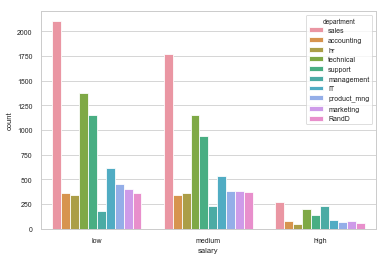

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
df = pd.read_csv('./data/HR.csv')
df = df.dropna(axis = 0,how='any')
df = df[df['last_evaluation']<=1][df['salary']!='nme'][df['department']!='sale']

sns.set_style(style='whitegrid')
sns.set_context(context='paper',font_scale=0.8)
sns.set_palette('summer')

#填入一个数组
# sns.countplot(x='salary',data = df)
sns.countplot(x = 'salary',data = df,hue='department')   #hue分类

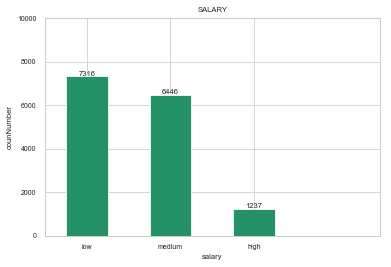

In [100]:
plt.title('SALARY')
plt.xlabel('salary')
plt.ylabel('counNumber')
plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)
#显示范围
plt.axis([0,4,0,10000])
plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width=0.5)
for x,y in zip(np.arange(len(df['salary'].value_counts())),df['salary'].value_counts()):
    plt.text(x+0.5,y,y,ha='center',va='bottom')



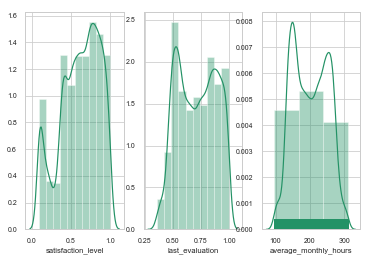

In [122]:
f = plt.figure()
f.add_subplot(1,3,1)
sns.distplot(df['satisfaction_level'],bins=10,)
f.add_subplot(1,3,2)
sns.distplot(df['last_evaluation'],bins=10)
f.add_subplot(1,3,3)
sns.distplot(df['average_monthly_hours'],bins=3,rug=True)


直方图横轴表示范围有意义的是面积,柱状图宽度没意义高度有意义

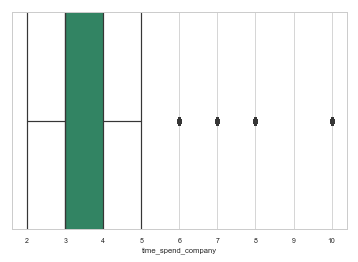

In [102]:
sns.boxplot(x=df['time_spend_company'],saturation=0.75,width=3)

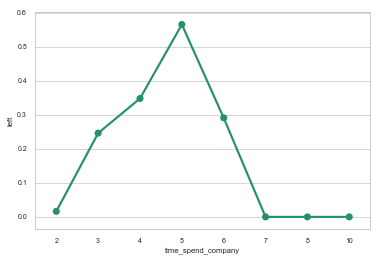

In [103]:
sub_df = df.groupby('time_spend_company').mean()
sns.pointplot(sub_df.index,sub_df['left'])

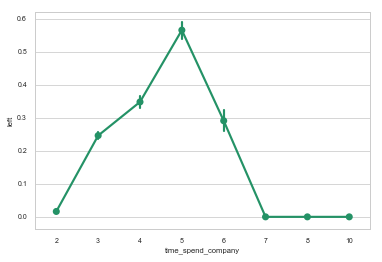

In [104]:
sns.pointplot(x='time_spend_company',y='left',data = df)
#还可以得到覆盖范围

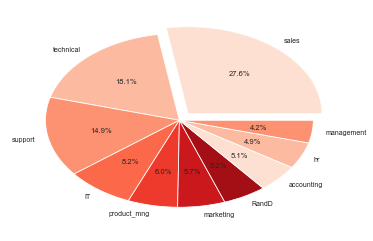

In [105]:
lbs=df["department"].value_counts().index
explodes = [0.1 if i=='sales' else 0 for i in lbs]
plt.pie(df["department"].value_counts(normalize=True),explode=explodes,autopct='%1.1f%%',colors=sns.color_palette("Reds", n_colors=7),labels=df["department"].value_counts().index)
plt.show()

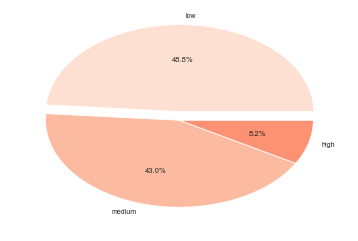

In [106]:
lbs=df["salary"].value_counts().index
explodes = [0.1 if i=='low' else 0 for i in lbs]
plt.pie(df["salary"].value_counts(normalize=True),explode=explodes,autopct='%1.1f%%',colors=sns.color_palette("Reds", n_colors=7),labels=df["salary"].value_counts().index)
plt.show()

In [126]:
df.sample(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
11574,0.49,0.52,4,161,7,0,0,0,management,high
